 ## <center>Case Study </center> 

### Data:

- Github User Collaboration Network
- Nodes: Users
- Edges: Collaboration on same Github repository

### Goal: 
1. Analyze Structure
2. Visualize
3. Build Simple Recommendation System to connect users

## I. Data Preprocessing

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
import os
import pickle

In [3]:
with open('data/github_users.p', 'rb') as f:
    x = nx.read_gpickle(f)

In [4]:
len(x.nodes())

56519

In [5]:
len(x.edges())

74095

In [6]:
x.nodes(data = True)[:10]

[('u54013', {'bipartite': 'users'}),
 ('u17973', {'bipartite': 'users'}),
 ('u41986', {'bipartite': 'users'}),
 ('u13403', {'bipartite': 'users'}),
 ('u47811', {'bipartite': 'users'}),
 ('u49045', {'bipartite': 'users'}),
 ('u47299', {'bipartite': 'users'}),
 ('u23234', {'bipartite': 'users'}),
 ('u16180', {'bipartite': 'users'}),
 ('u40749', {'bipartite': 'users'})]

In [7]:
x.edges(data = True)[:10]

[('u4446', 'u10030', {}),
 ('u4446', 'u5170', {}),
 ('u4446', 'u7710', {}),
 ('u4446', 'u1233', {}),
 ('u4446', 'u1745', {}),
 ('u4446', 'u7327', {}),
 ('u4446', 'u5972', {}),
 ('u4446', 'u8249', {}),
 ('u4446', 'u8189', {}),
 ('u4446', 'u8145', {})]

In [8]:
x_n = [(n, d) for n, d in x.nodes(data = True)]

In [9]:
x_n1 = [n for n, d in x.nodes(data = True)][:10000]

In [10]:
x_n1[:10]

['u54013',
 'u17973',
 'u41986',
 'u13403',
 'u47811',
 'u49045',
 'u47299',
 'u23234',
 'u16180',
 'u40749']

In [11]:
nodes_1 = [(n, d) for n, d in x.nodes(data = True)][:5000]

In [12]:
nodes_2 = [n for n, d in x.nodes(data = True)][:5000]

In [13]:
len(nodes_2)

5000

In [14]:
e_n = [(u, v, d) for u, v, d in x.edges(data = True)]

In [15]:
edges_1 = [(u, v, d) for u, v, d in x.edges(data = True) if u in nodes_2 if v in nodes_2]

In [16]:
len(e_n)

74095

In [17]:
len(edges_1)

611

In [19]:
G = nx.Graph()
G.add_nodes_from(nodes_1)
G.add_edges_from(edges_1)

In [20]:
g = nx.Graph()
g.add_nodes_from(x_n)
g.add_edges_from(e_n)

## II. Visualization

This is the distribution of node degrees computed across all nodes in a network.

In [21]:
%matplotlib inline

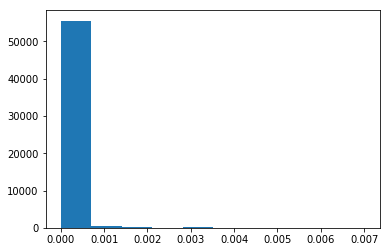

In [22]:
# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.degree_centrality(g).values()))
plt.show()

<div class = "alert alert-warning">
  <strong> Computational Limitations!</strong> 
</div>

In [133]:
list(nx.betweenness_centrality(G).values())[:10]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

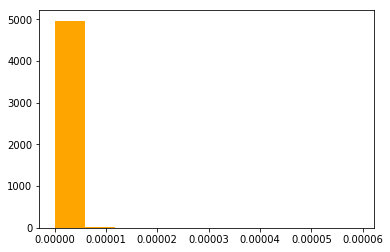

In [137]:
plt.hist(list(nx.betweenness_centrality(G).values()), color = 'orange')
plt.show()

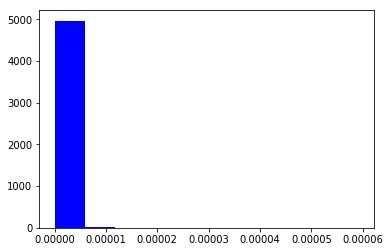

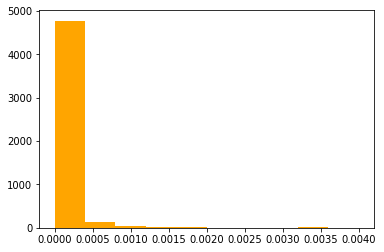

In [142]:
plt.hist(list(nx.betweenness_centrality(G).values()), color = 'blue')
plt.show()
plt.hist(list(nx.degree_centrality(G).values()), color = 'orange')
plt.show()

<div class = "alert alert-warning">
  <strong> Computational Limitations!</strong> 
</div>

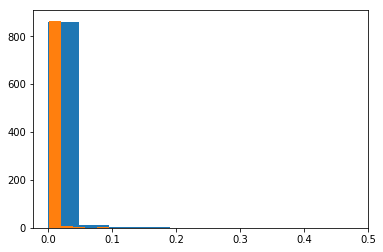

In [15]:
plt.hist(list(nx.betweenness_centrality(G).values()))
plt.hist(list(nx.degree_centrality(G).values()))
plt.show()

### Matrix Plot

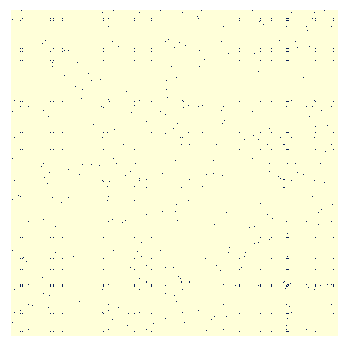

In [24]:
# Import necessary modules
from nxviz import MatrixPlot
import matplotlib.pyplot as plt

# Calculate the largest connected component subgraph: largest_ccs
largest_ccs = sorted(nx.connected_component_subgraphs(g), key=lambda x: len(x))[-1]

# Create the customized MatrixPlot object: h
h = MatrixPlot(graph = largest_ccs)

# Draw the MatrixPlot to the screen
h.draw()
plt.show()

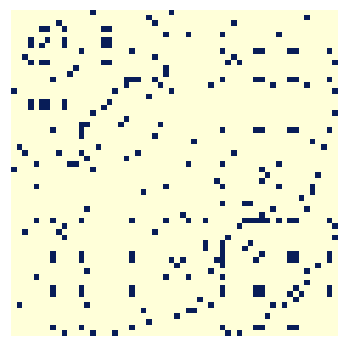

In [147]:
# Import necessary modules
from nxviz import MatrixPlot
import matplotlib.pyplot as plt

# Calculate the largest connected component subgraph: largest_ccs
largest_ccs = sorted(nx.connected_component_subgraphs(G), key=lambda x: len(x))[-1]

# Create the customized MatrixPlot object: h
h = MatrixPlot(graph = largest_ccs)

# Draw the MatrixPlot to the screen
h.draw()
plt.show()

### Circos Plot

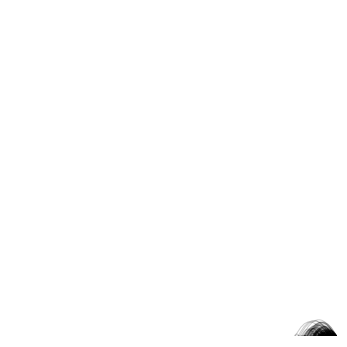

<Figure size 144x144 with 0 Axes>

In [26]:
# Import necessary modules
from nxviz.plots import ArcPlot
import matplotlib.pyplot as plt

# Iterate over all the nodes in G, including the metadata
for n, d in G.nodes(data = True):

    # Calculate the degree of each node: G.node[n]['degree']
    G.node[n]['degree'] = nx.degree(g, n)
    
# Create the ArcPlot object: a
a = ArcPlot(graph = G, node_order = 'degree', labels = True)

# Draw the ArcPlot to the screen
plt.figure(figsize=(2,2))
a.draw()
plt.show()

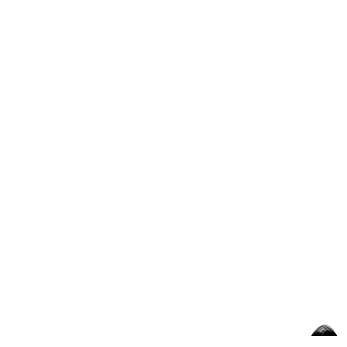

<Figure size 144x144 with 0 Axes>

In [148]:
# Import necessary modules
from nxviz.plots import ArcPlot
import matplotlib.pyplot as plt

# Iterate over all the nodes in G, including the metadata
for n, d in G.nodes(data = True):

    # Calculate the degree of each node: G.node[n]['degree']
    G.node[n]['degree'] = nx.degree(G, n)
    
# Create the ArcPlot object: a
a = ArcPlot(graph = G, node_order = 'degree', labels = True)

# Draw the ArcPlot to the screen
plt.figure(figsize=(2,2))
a.draw()
plt.show()

<div class = "alert alert-warning">
  <strong> Zoomed Version of it - Not supported by NetworkX 2.4</strong> 
</div>

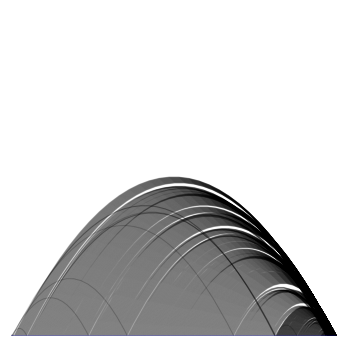

<Figure size 144x144 with 0 Axes>

In [30]:
# Import necessary modules
from nxviz.plots import ArcPlot
import matplotlib.pyplot as plt

# Iterate over all the nodes in G, including the metadata
for n, d in G.nodes(data = True):

    # Calculate the degree of each node: G.node[n]['degree']
    G.node[n]['degree'] = nx.degree(G, n)
    
# Create the ArcPlot object: a
a = ArcPlot(graph = G, node_order = 'degree', labels = True)

# Draw the ArcPlot to the screen
plt.figure(figsize=(2,2))
a.draw()
plt.show()

**Note:** You can observe that most of the nodes are tightly connected to each other.

Arc Plot is great for visualizing the Graph with medium number of edges. In addition to adding to plotting the arcs, the above code snippet should also display the nodes. The nodes are actually plotted in the above graph but are too small to notice.

So, we plot the edges and nodes with an alternative plot, the `Circos Plot`.

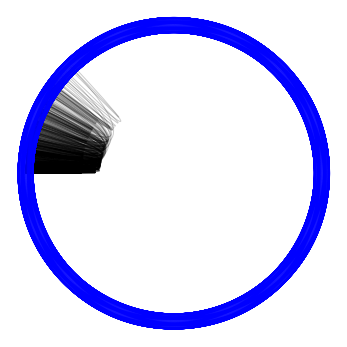

In [35]:
# Import necessary modules
from nxviz import CircosPlot
import matplotlib.pyplot as plt 
 
# Iterate over all the nodes, including the metadata
for n, d in G.nodes(data = True):

    # Calculate the degree of each node: G.node[n]['degree']
    G.node[n]['degree'] = nx.degree(g, n)

# Create the CircosPlot object: c
c = CircosPlot(graph = G, node_order = 'degree')

# Draw the CircosPlot object to the screen
c.draw()
plt.show()

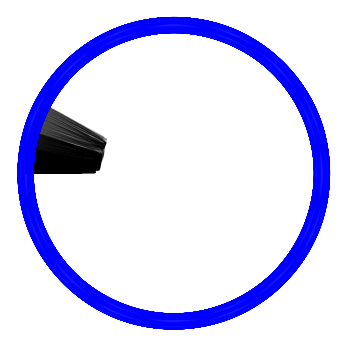

In [149]:
# Import necessary modules
from nxviz import CircosPlot
import matplotlib.pyplot as plt 
 
# Iterate over all the nodes, including the metadata
for n, d in G.nodes(data = True):

    # Calculate the degree of each node: G.node[n]['degree']
    G.node[n]['degree'] = nx.degree(G, n)

# Create the CircosPlot object: c
c = CircosPlot(graph = G, node_order = 'degree')

# Draw the CircosPlot object to the screen
c.draw()
plt.show()

** Note:** The blue circle that the arcs are surrounded by is not a circle. They are the collection of nodes highlighted in Blue.

## III. Cliques: 

**Cliques** are "groups of nodes that are fully connected to one another". 

A **Maximal Clique** is a clique that cannot be extended by adding another node in the graph.

In [37]:
# Calculate the maximal cliques in G: cliques
cliques = nx.find_cliques(g)

# Count and print the number of maximal cliques in G
print(cliques)

<generator object find_cliques at 0x0000000015579B48>


In [38]:
list(cliques)[:100]

[['u25166'],
 ['u12103'],
 ['u18720'],
 ['u26234'],
 ['u1950',
  'u2196',
  'u901',
  'u10760',
  'u1069',
  'u904',
  'u2558',
  'u86',
  'u10292',
  'u3710',
  'u3016',
  'u142',
  'u990',
  'u4996',
  'u2113',
  'u10486',
  'u653',
  'u1260',
  'u1870',
  'u4614',
  'u9290',
  'u6532',
  'u4935',
  'u4279',
  'u6134',
  'u294',
  'u3821',
  'u7118',
  'u9371',
  'u72',
  'u5813',
  'u1791',
  'u1376',
  'u6699',
  'u2994',
  'u5538',
  'u1771',
  'u703',
  'u2095',
  'u2270',
  'u1374',
  'u52',
  'u7882',
  'u1520',
  'u2632',
  'u1481',
  'u1155',
  'u9312',
  'u9589',
  'u9957',
  'u156',
  'u5042',
  'u3104',
  'u4792',
  'u647',
  'u10228',
  'u8438',
  'u2185',
  'u8458',
  'u4386',
  'u3790',
  'u10019',
  'u5484',
  'u4652',
  'u627',
  'u1885',
  'u4820',
  'u1731',
  'u106',
  'u5269',
  'u1385',
  'u7129',
  'u6014',
  'u2462',
  'u1856',
  'u2289',
  'u2823',
  'u1170',
  'u2152',
  'u4625',
  'u1129',
  'u3307',
  'u198'],
 ['u38255'],
 ['u31613'],
 ['u17337'],
 ['u8460

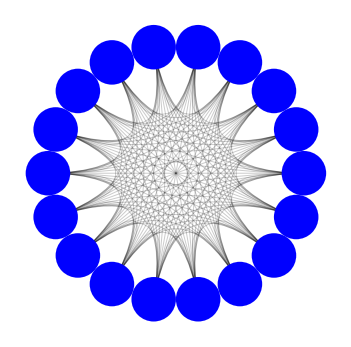

In [152]:
# Import necessary modules
import networkx as nx
from nxviz import CircosPlot
import matplotlib.pyplot as plt

# Find the author(s) that are part of the largest maximal clique: largest_clique
largest_clique = sorted(nx.find_cliques(G), key=lambda x:len(x))[-1]

# Create the subgraph of the largest_clique: G_lc
G_lc = G.subgraph(largest_clique)

# Create the CircosPlot object: c
c = CircosPlot(G_lc)

# Draw the CircosPlot to the screen
c.draw()
plt.show()

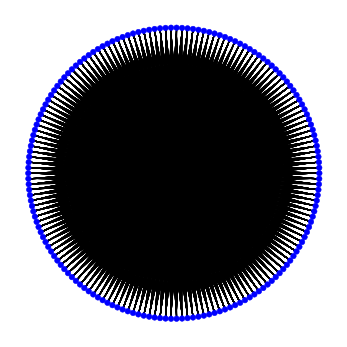

In [40]:
# Import necessary modules
import networkx as nx
from nxviz import CircosPlot
import matplotlib.pyplot as plt

# Find the author(s) that are part of the largest maximal clique: largest_clique
largest_clique = sorted(nx.find_cliques(g), key=lambda x:len(x))[-1]

# Create the subgraph of the largest_clique: G_lc
g_lc = g.subgraph(largest_clique)

# Create the CircosPlot object: c
c = CircosPlot(g_lc)

# Draw the CircosPlot to the screen
c.draw()
plt.show()

## IV. Building Recommendation System:

- Find Important Users (Degree Centrality)
- Find Largest Communities of Collaborators (Maximal Clique)
- Build a collaboration recommendsation system (Open Triangle)

In [42]:
# Compute the degree centralities of G: deg_cent
deg_cent = nx.degree_centrality(G)

# Compute the maximum degree centrality: max_dc
max_dc = max(deg_cent.values())

# Find the user(s) that have collaborated the most: prolific_collaborators
prolific_collaborators = [n for n, dc in deg_cent.items() if dc == max_dc]

# Print the most prolific collaborator(s)
print(prolific_collaborators)

['u437', 'u1887', 'u1145']


In [43]:
max_dc

0.004000800160032006

In [44]:
# Compute the degree centralities of G: deg_cent
deg_cent = nx.degree_centrality(g)

# Compute the maximum degree centrality: max_dc
max_dc = max(deg_cent.values())

# Find the user(s) that have collaborated the most: prolific_collaborators
prolific_collaborators = [n for n, dc in deg_cent.items() if dc == max_dc]

# Print the most prolific collaborator(s)
print(prolific_collaborators)

['u89']


**Note:** 'u89' is the most prolific collaborator.

In [45]:
max_dc

0.007024310839024736

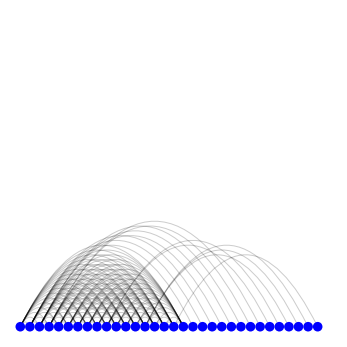

In [154]:
# Import necessary modules
from nxviz import ArcPlot
import matplotlib.pyplot as plt
 
# Identify the largest maximal clique: largest_max_clique
largest_max_clique = set(sorted(nx.find_cliques(G), key=lambda x: len(x))[-1])

# Create a subgraph from the largest_max_clique: G_lmc
G_lmc = G.subgraph(largest_max_clique)

# Go out 1 degree of separation
for node in G_lmc.nodes():
    G_lmc.add_nodes_from(G.neighbors(node))
    G_lmc.add_edges_from(zip([node]*len(G.neighbors(node)), G.neighbors(node)))

# Record each node's degree centrality score
for n in G_lmc.nodes():
    G_lmc.node[n]['degree centrality'] = nx.degree_centrality(G_lmc)[n]
        
# Create the ArcPlot object: a
a = ArcPlot(G_lmc)

# Draw the ArcPlot to the screen
a.draw()
plt.show()

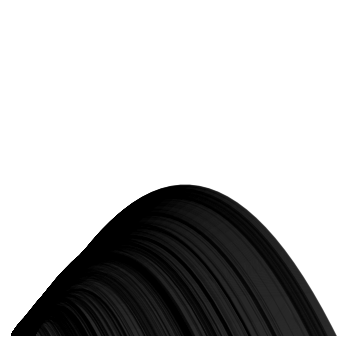

In [46]:
# Import necessary modules
from nxviz import ArcPlot
import matplotlib.pyplot as plt
 
# Identify the largest maximal clique: largest_max_clique
largest_max_clique = set(sorted(nx.find_cliques(g), key=lambda x: len(x))[-1])

# Create a subgraph from the largest_max_clique: G_lmc
g_lmc = g.subgraph(largest_max_clique)

# Go out 1 degree of separation
for node in g_lmc.nodes():
    g_lmc.add_nodes_from(g.neighbors(node))
    g_lmc.add_edges_from(zip([node]*len(g.neighbors(node)), g.neighbors(node)))

# Record each node's degree centrality score
for n in g_lmc.nodes():
    g_lmc.node[n]['degree centrality'] = nx.degree_centrality(g_lmc)[n]
        
# Create the ArcPlot object: a
a = ArcPlot(g_lmc)

# Draw the ArcPlot to the screen
a.draw()
plt.show()

NetworkX 2.6 (current version) does not support mutation of Sub Graphs which is supported by earlier versions of NetworkX

<img src = "img/Largest_Communities.png">

In [45]:
# Import necessary modules
from itertools import combinations
from collections import defaultdict

# Initialize the defaultdict: recommended
recommended = defaultdict(int)

# Iterate over all the nodes in G
for n, d in G.nodes(data = True):

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):
    
        # Check whether n1 and n2 do not have an edge
        if not G.has_edge(n1, n2):
        
            # Increment recommended
            recommended[(n1, n2)] += 1

# Identify the top 10 pairs of users
all_counts = sorted(recommended.values())
top4_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]
print(top4_pairs)

[('u4071', 'u2644'), ('u6743', 'u733'), ('u6367', 'u9031'), ('u9031', 'u733')]


In [48]:
# Import necessary modules
from itertools import combinations
from collections import defaultdict

# Initialize the defaultdict: recommended
recommended = defaultdict(int)

# Iterate over all the nodes in G
for n, d in g.nodes(data = True):

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(g.neighbors(n), 2):
    
        # Check whether n1 and n2 do not have an edge
        if not g.has_edge(n1, n2):
        
            # Increment recommended
            recommended[(n1, n2)] += 1

# Identify the top 10 pairs of users
all_counts = sorted(recommended.values())
top4_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]
print(top4_pairs)

[('u298', 'u1294'), ('u1436', 'u211'), ('u89', 'u1069'), ('u198', 'u298')]


**Notes:** Above are the top 4 user pairs that should collaborate together according to the recommendation system.